In [2]:
from google.colab import drive
# drive._mount('/content/drive')

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/past_weather.csv', encoding='CP949')

In [5]:
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s)
0,90,속초,2015-01-01,-4.6,-7.9,-1.8,NaN,2.2
1,90,속초,2015-01-02,-2.9,-5.4,0.9,NaN,3.4
2,90,속초,2015-01-03,1.1,-7.2,6.9,NaN,2.5
3,90,속초,2015-01-04,5.8,1.9,10.4,NaN,2.2
4,90,속초,2015-01-05,7.3,2.2,12.2,NaN,2.4
...,...,...,...,...,...,...,...,...
246165,295,남해,2022-02-07,0.5,-4.1,3.3,NaN,0.8
246166,295,남해,2022-02-08,2.7,-1.8,8.1,NaN,1.2
246167,295,남해,2022-02-09,4.0,-1.7,9.2,NaN,1.0
246168,295,남해,2022-02-10,5.7,1.5,11.3,NaN,1.2


In [6]:
df = df.fillna(0)

In [7]:
from datetime import datetime
df['일시'] = pd.to_datetime(df['일시'])

In [8]:
df.dtypes

지점                     int64
지점명                   object
일시            datetime64[ns]
평균기온(°C)             float64
최저기온(°C)             float64
최고기온(°C)             float64
일강수량(mm)             float64
평균 풍속(m/s)           float64
dtype: object

In [9]:
df['year'] = df['일시'].dt.year
df['month'] = df['일시'].dt.month

In [10]:
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),year,month
0,90,속초,2015-01-01,-4.6,-7.9,-1.8,0.0,2.2,2015,1
1,90,속초,2015-01-02,-2.9,-5.4,0.9,0.0,3.4,2015,1
2,90,속초,2015-01-03,1.1,-7.2,6.9,0.0,2.5,2015,1
3,90,속초,2015-01-04,5.8,1.9,10.4,0.0,2.2,2015,1
4,90,속초,2015-01-05,7.3,2.2,12.2,0.0,2.4,2015,1
...,...,...,...,...,...,...,...,...,...,...
246165,295,남해,2022-02-07,0.5,-4.1,3.3,0.0,0.8,2022,2
246166,295,남해,2022-02-08,2.7,-1.8,8.1,0.0,1.2,2022,2
246167,295,남해,2022-02-09,4.0,-1.7,9.2,0.0,1.0,2022,2
246168,295,남해,2022-02-10,5.7,1.5,11.3,0.0,1.2,2022,2


In [11]:
df['season'] = df['month'].apply(lambda x: 1 if x == 3 or x == 4 or x == 5 else 2 if  x == 6 or x == 7 or x == 8 else 3 if x == 9 or x == 10 or x == 11 else 4 ) 

In [21]:
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),year,month,season
0,90,속초,2015-01-01,-4.6,-7.9,-1.8,0.0,2.2,2015,1,4
1,90,속초,2015-01-02,-2.9,-5.4,0.9,0.0,3.4,2015,1,4
2,90,속초,2015-01-03,1.1,-7.2,6.9,0.0,2.5,2015,1,4
3,90,속초,2015-01-04,5.8,1.9,10.4,0.0,2.2,2015,1,4
4,90,속초,2015-01-05,7.3,2.2,12.2,0.0,2.4,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...
246165,295,남해,2022-02-07,0.5,-4.1,3.3,0.0,0.8,2022,2,4
246166,295,남해,2022-02-08,2.7,-1.8,8.1,0.0,1.2,2022,2,4
246167,295,남해,2022-02-09,4.0,-1.7,9.2,0.0,1.0,2022,2,4
246168,295,남해,2022-02-10,5.7,1.5,11.3,0.0,1.2,2022,2,4


In [12]:
df.drop(['일시'], axis=1, inplace = True)

In [13]:
df.drop(['최저기온(°C)'], axis=1, inplace = True)
df.drop(['최고기온(°C)'], axis=1, inplace = True)

In [29]:
df

,지점,지점명,평균기온(°C),일강수량(mm),평균 풍속(m/s),year,month,season
0,90,속초,-4.6,0.0,2.2,2015,1,4
1,90,속초,-2.9,0.0,3.4,2015,1,4
2,90,속초,1.1,0.0,2.5,2015,1,4
3,90,속초,5.8,0.0,2.2,2015,1,4
4,90,속초,7.3,0.0,2.4,2015,1,4
...,...,...,...,...,...,...,...,...
246165,295,남해,0.5,0.0,0.8,2022,2,4
246166,295,남해,2.7,0.0,1.2,2022,2,4
246167,295,남해,4.0,0.0,1.0,2022,2,4
246168,295,남해,5.7,0.0,1.2,2022,2,4


In [14]:
df.sort_values(by = '평균 풍속(m/s)', ascending = False) # 평균 풍속 10 이상 -> 겉옷 필수, 일강수량 0 이상이면 우산 필수

,지점,지점명,평균기온(°C),일강수량(mm),평균 풍속(m/s),year,month,season
112238,185,고산,1.3,0.2,22.3,2020,12,4
110436,185,고산,-3.5,1.8,21.4,2016,1,4
112287,185,고산,1.1,0.0,21.0,2021,2,4
111378,185,고산,24.2,84.6,20.3,2018,8,2
110798,185,고산,3.3,0.6,20.0,2017,1,4
...,...,...,...,...,...,...,...,...
238028,288,밀양,6.1,1.8,0.0,2021,3,1
84746,159,부산,7.4,0.0,0.0,2021,1,4
100168,172,고창,28.1,0.1,0.0,2020,8,2
199416,264,함양군,0.6,3.5,0.0,2015,1,4


In [ ]:
# season : spring 1, summer 2, autumn 3, winter 4
# clothes : 
# ~4 : 패딩, 두꺼운 코드, 히트텍, 목도리, 장갑  -- so cold 1
# 5~8 : 코트, 가죽자켓, 니트, 플리스 -- cold 2
# 9~11 : 트렌치코트, 야상, 자켓  -- chilly 3
# 12~16 : 기모후드티, 가디건, 니트/맨투맨 -- little chilly 4
# 17~19 : 후드티, 바람막이, 슬랙스 --  little warm 5
# 20~22 : 셔츠, 7부바지, 면바지 --  warm 6
# 23~27 : 티셔츠, 반바지 -- hot 7
# 28~ : 민소매, 숏팬츠 -- so hot 8

In [15]:
conditionlist = [
                 (df['평균기온(°C)'] < 5.0),
                 ((df['평균기온(°C)'] > 4.0 )& (df['평균기온(°C)'] < 9.0)),
                 ((df['평균기온(°C)'] > 8.0 )& (df['평균기온(°C)'] < 12.0)),
                 ((df['평균기온(°C)'] > 11.0) & (df['평균기온(°C)'] < 17.0)),
                 ((df['평균기온(°C)'] > 16.0) & (df['평균기온(°C)'] < 20.0)),
                 ((df['평균기온(°C)'] > 19.0) & (df['평균기온(°C)'] < 23.0)),
                 ((df['평균기온(°C)'] > 22.0) & (df['평균기온(°C)'] < 28.0)),
                 (df['평균기온(°C)'] > 27.0)
]

choicelist = [1,2,3,4,5,6,7,8]

In [16]:
import numpy as np

df['outfit'] = np.select(conditionlist, choicelist, default = 'Not Specified')

In [17]:
df.drop(['year'], axis=1, inplace = True)
df.drop(['month'], axis=1, inplace = True)

In [18]:
df.drop(['지점명'], axis=1, inplace = True)

In [19]:
df.rename(columns = {'평균 풍속(m/s)':'평균풍속(m/s)'}, inplace=True)

In [20]:
df

,지점,평균기온(°C),일강수량(mm),평균풍속(m/s),season,outfit
0,90,-4.6,0.0,2.2,4,1
1,90,-2.9,0.0,3.4,4,1
2,90,1.1,0.0,2.5,4,1
3,90,5.8,0.0,2.2,4,2
4,90,7.3,0.0,2.4,4,2
...,...,...,...,...,...,...
246165,295,0.5,0.0,0.8,4,1
246166,295,2.7,0.0,1.2,4,1
246167,295,4.0,0.0,1.0,4,1
246168,295,5.7,0.0,1.2,4,2


In [28]:
target = 'outfit'
features = df.columns.drop([target, '지점'])

In [59]:
df.to_csv('weather.csv', encoding='utf-8-sig')

In [22]:
df.isna().sum().sort_values()

지점           0
평균기온(°C)     0
일강수량(mm)     0
평균풍속(m/s)    0
season       0
outfit       0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=2)
train.shape, test.shape

((196936, 6), (49234, 6))

In [24]:
train, val = train_test_split(train, test_size =0.2, random_state=2)
train.shape, val.shape

((157548, 6), (39388, 6))

In [29]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
pip install category_encoders

In [32]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도 : ', pipe.score(X_val, y_val))

검증 정확도 :  0.9153295419924851


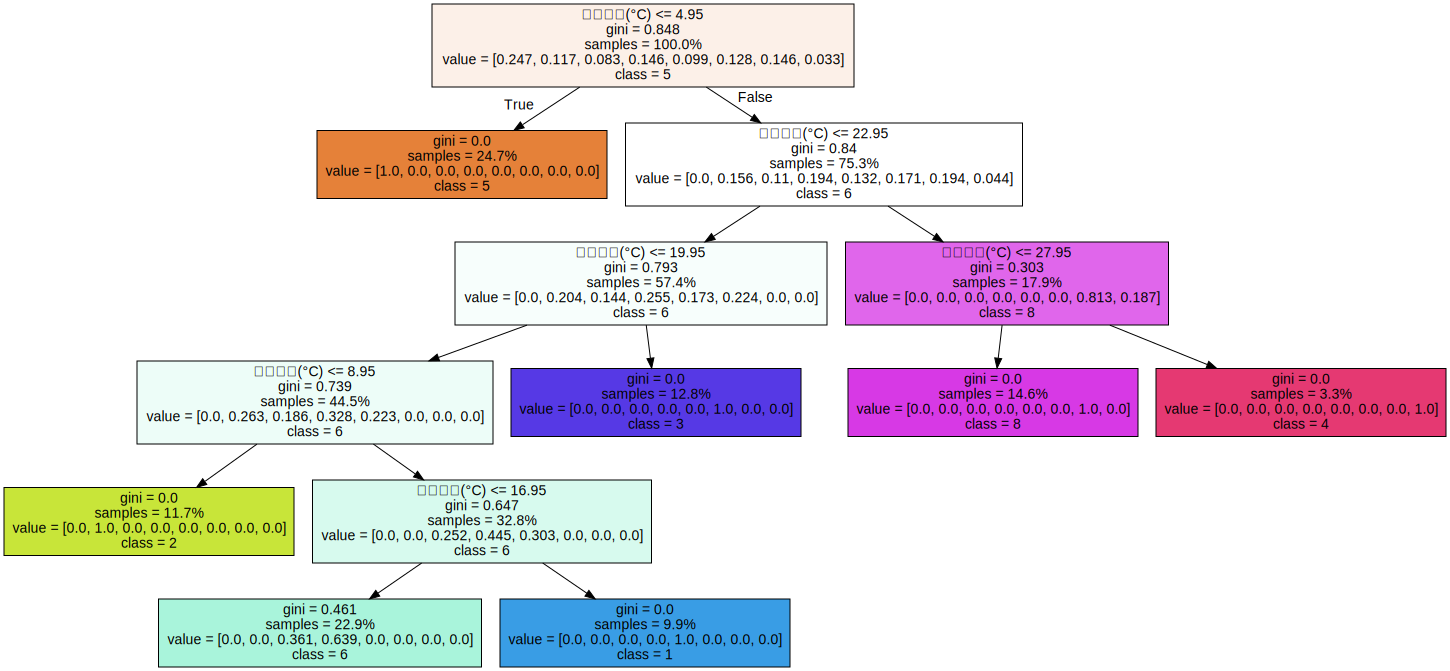

In [33]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

In [38]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(n_jobs = -1, random_state=2, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도 : ', pipe.score(X_val,y_val) )

검증 정확도 :  1.0


In [40]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=2)
)

dists = {
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions= dists,
    n_iter =30,
    cv = 3,
    scoring = 'f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)
print('최적 하이퍼파라미터: ', clf.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.51401754848641, 'randomforestclassifier__n_estimators': 66}


In [41]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(n_jobs = -1, random_state=2, oob_score=True, max_depth=20, max_features = 0.51401754848641, n_estimators=66)
)

pipe.fit(X_train, y_train)
print('검증 정확도 : ', pipe.score(X_val,y_val) )

검증 정확도 :  1.0
